In [ ]:
import networkx as nx
#import matplotlib.pyplot as plt

In [ ]:
G=nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9])

In [ ]:
G.add_edges_from([(1,2),(1,3),(1,6),(2,4),(2,6),(2,7),(3,4),(4,5),(5,8),(5,9)])

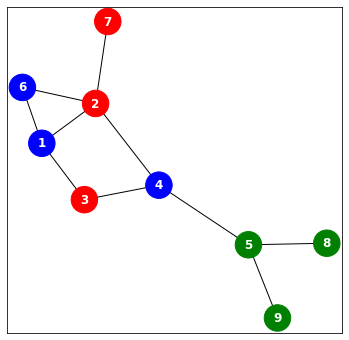

In [ ]:
plt.figure(figsize=(6,6))
nx.draw_networkx(G,with_labels=True,node_color=['blue','red','red','blue','green','blue','red',
                                                'green','green'],node_size=700, font_weight='bold',font_color='white')
plt.show()

Def : $ A \  (n,m,D,\gamma,\alpha) \  bipartite \ expander \  is\  a \ D-left \ regular \ bipartite \ graph \ G( \ L \ U \  R \ ,E \ ) \ where \ |L| = n \ and \ |R|=m \ such\ that\ \ \forall S \subseteq L \ with \ |S|\leq \gamma n, \ |N(S)|\geq \alpha |S|$

Trivially,It can be seen that:
1. $\alpha \leq D$
2. $\gamma \leq 1$

The desirable properties of an expander are :
 1. D should be as small as possible(Sparsity)
 2. $\alpha$(also called the Expansion factor)  should be as close to D as  possible
 3. $\gamma$  should be as large as possible

$Theorem : \forall \epsilon >0, \ m\leq n, \exists \gamma \geq 0 \ and\ D \geq 1 \ such\ that\ a\ (n,m,D,\gamma,D(1-\epsilon))\ expander\ exists.\ Additionally\ D=\Theta(\frac{log(\frac{n}{m})}{\epsilon}) \ and\ \gamma n=\Theta(\frac{\epsilon m}{D})$

\\


1. It can be seen that a low $\epsilon$ means the expansion factor getting close to D. But the downside is that D increases(less sparse) and $\gamma$ decreases

2. When $m \leq n$, the direction of expansion is harder and is hard to construct a good expander. 

3. The degree D and $\gamma$ are functions of $\frac{m}{n} \ and \  \epsilon$
4. Explicit construction methods exist so that the expander stated in the above theorem can be constructed. 

\begin{bmatrix}
1&0&0&1&0&1&0 \\
1&0&1&0&0&1&0 \\
0&1&0&0&1&0&1 \\
0&1&1&0&1&0&0 \\
0&0&0&1&0&0&1
\end{bmatrix}

Lemma : $\textbf{$Let \ G\ be\ a\ (n,m,D,\gamma,D(1-\epsilon))\ expander\ with\ \epsilon < \frac{1}{2}. Then\ for\ any\ S \subseteq L\ such\ that\ |S|\leq \gamma n, U(S) \geq D(1-2\epsilon)|S|$}$

Proof: \\
1. N(S) $\geq D(1-\epsilon)|S|$ \\
2. No of edges out of S = D|S|.  
3. So,we must assign D|S| edges to N(S) vertices .
4. First assign N(S) edges to N(S) vertices.
5. No of edges remaining = D|S|- N(S) $\leq$ D|S|- D(1-$\epsilon$)|S|=D$\epsilon$|S|. \\
6. Let Maximum number of vertices these can be assigned to the remaining edges be K(S). K(S) $\leq$ D$\epsilon$|S|
7. The vertices to which we did not assign the remaining edges are unique neighbors. \\
  U(S)= N(S) - K(S) $\geq$ D(1-$\epsilon$)|S| - D$\epsilon$|S| = D(1- 2$\epsilon$)|S|


In [ ]:
import numpy as np
A= np.array([[1,0,0,1,0,1,0],[1,0,1,0,0,1,0],[0,1,0,0,1,0,1],[0,1,1,0,1,0,0],[0,0,0,1,0,0,1]])

for i1 in range(0,2):
  for i2 in range(0,2):
    for i3 in range(0,2):
      for i4 in range(0,2):
        for i5 in range(0,2):
          for i6 in range(0,2):
            for i7 in range(0,2):
              x=np.array([i1,i2,i3,i4,i5,i6,i7])
              y=np.dot(A,x)
              if(not np.sum(y%2)):
                print(x)


[0 0 0 0 0 0 0]
[0 0 1 1 1 1 1]
[0 1 0 0 1 0 0]
[0 1 1 1 0 1 1]
[1 0 0 0 0 1 0]
[1 0 1 1 1 0 1]
[1 1 0 0 1 1 0]
[1 1 1 1 0 0 1]


In [ ]:
import numpy as np
a=np.array([2,4,6,8,2,1])
if(not np.sum(a%2)):
  print(False)
else:
  print(True)


True


$\textbf{For an expander generated code(with $\epsilon$ < $\frac{1}{2}$), minimum distance is always greater than $\gamma$n}$

$\textbf{Why?}:$ \\
Consider any codeword with weight less than $\gamma$n. Let all the left nodes which take value 1 form set S. \\
Hence, |S|$\leq \gamma n$.  By the unique neighbors lemma, there is atleast a vertex on right, say r, which is connected to only one 1 \\
$\textbf{A contradiction}$, since the sum of all left nodes connected to any right node must be 0. But for r, sum becomes 1. 

$\textbf{If we consider the number of unique neighbours, we get d $\geq 2\gamma n(1-\epsilon)$}$. The proof goes almost the same way

Rate (R) : $\geq 1-\frac{m}{n}$ \\
Relative minimum distance($\delta$) : $\geq 2\gamma (1-\epsilon)$ \\
Let $r_0$=$1- \frac{m}{n}$ and $\delta_0$=2$\gamma (1-\epsilon)$

$\textbf{$r_0$ is a function of $\frac{m}{n}$  and $\delta_0$ is a function of $\frac{m}{n}$ and $\epsilon$, as $\gamma$ depends on $\frac{m}{n}$} $ \\


In [ ]:
import numpy as np
import itertools 
import random
import pandas as pd

def generate_ParityCheckMatrix(n,m,D):
  A=np.zeros((m,n),dtype=int)
  #S=set(range(0,m))
  #combs=list(itertools.combinations(S,D))
  #K=len(combs)
  print("Parity Check Matrix")
  print(40*"_")
  for i in range(0,n):
    while(np.sum(A[:,i])<D):
      j=random.randint(0,m-1)
      A[j,i]=1
  print(A)
  print(40*"_")
  return A






def generate_codewords(A,n):
  S=set(range(0,n))
  x=np.zeros(n,dtype=int)
  #print(x)
  tot=1
  min_weight=n
  for i in range(1,n):
    combs=list(itertools.combinations(S,i))
    for t in combs:
      x=np.zeros(n,dtype=int)
      t=list(t)
      x[t]=1
      y=np.dot(A,x)
      if(not np.sum(y%2)):
        #print(x)
        tot+=1
        if(i<min_weight):
          min_weight=i
  print("n               :",n)
  print("m               :",m)
  print("1-m/n           :",1-m/n)
  print("rate            :", np.log2(tot)/n)
  print("minimum_distance: ",min_weight)
  print(40*"_")


def get_neighbors(A,x,n,m):
  x=list(x)
  total=0
  
  for i in range(0,m):
    if(np.sum(A[i,x])!=0):
      total+=1
    

  return total


def get_parameters_expander(A,n,m,D):
  min_neighbors=[D]
  S=set(range(0,n))
  mini=m
  for i in range(2,n+1):
    combinations=list(itertools.combinations(S,i))
    mini=m
    for combi in combinations:
      neighs=get_neighbors(A,combi,n,m)
      mini=min(neighs,mini)

    min_neighbors.append(mini)
  
  #print(min_neighbors)
  return min_neighbors

def get_exp_props(min_neigbors,n,m,D):
  mod_S=np.array(list(range(1,n+1)))
  mod_NS=np.array(min_neighbors)
  gamma=mod_S/n
  alpha_dash=mod_NS/mod_S
  alpha=np.zeros(n)
  alpha[0]=alpha_dash[0]
  for i in range(1,n):
    alpha[i]=min(alpha[i-1],alpha_dash[i])

  one_minus_eps=alpha/D
  epsilon=1-one_minus_eps
  deltas= 2*n*gamma*(one_minus_eps)
  relative_deltas=deltas/n
  
  data={'epsilon': epsilon, 'gamma' : gamma, '2*gamma*n*(1-eps)':deltas}
  df=pd.DataFrame(data,columns=['epsilon','gamma','2*gamma*n*(1-eps)'])
  print(df)






  
n=16
m=10
D=4

A=generate_ParityCheckMatrix(n,m,D)
codes=generate_codewords(A,n)
min_neighbors=get_parameters_expander(A,n,m,D)

get_exp_props(min_neighbors,n,m,D)


Parity Check Matrix
________________________________________
[[0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0]
 [0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1]
 [1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1]
 [1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1]
 [1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0]]
________________________________________
n               : 16
m               : 10
1-m/n           : 0.375
rate            : 0.4375
minimum_distance:  3
________________________________________
     epsilon   gamma  2*gamma*n*(1-eps)
0   0.000000  0.0625           2.000000
1   0.375000  0.1250           2.500000
2   0.583333  0.1875           2.500000
3   0.625000  0.2500           3.000000
4   0.700000  0.3125           3.000000
5   0.708333  0.3750           3.500000
6   0.750000  0.4375           3.500000
7   0.750000  0.5000           4.000000
8   0.777778  0.5625           4.0

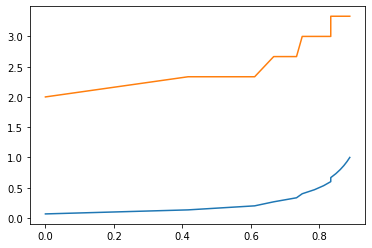

In [ ]:
import matplotlib.pyplot as plt
epsilon=[0. ,0.41666667, 0.61111111, 0.66666667, 0.73333333, 0.75,0.78571429, 0.8125 ,    0.83333333, 0.83333333, 0.84848485, 0.86111111,0.87179487, 0.88095238, 0.88888889]
gamma=[0.06666667, 0.13333333, 0.2 , 0.26666667, 0.33333333, 0.4,0.46666667, 0.53333333, 0.6,0.66666667, 0.73333333, 0.8,0.86666667, 0.93333333, 1]
distance = [2. ,        2.33333333, 2.33333333, 2.66666667, 2.66666667, 3. ,
 3. ,         3.  ,       3. ,        3.33333333 ,3.33333333, 3.33333333,
 3.33333333, 3.33333333, 3.33333333]
plt.plot(epsilon,gamma)
plt.plot(epsilon,distance)